In [ ]:

% matplotlib inline

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
from datetime import datetime
%matplotlib inline

Text(0, 0.5, 'Volume')

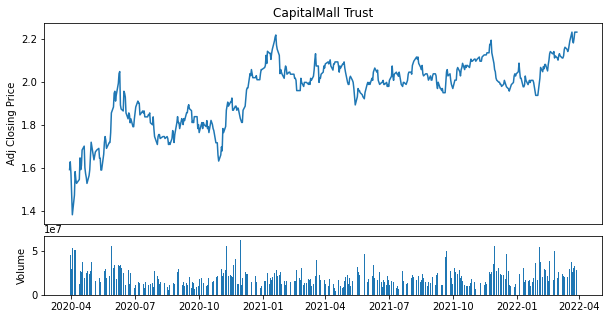

In [18]:
from pandas_datareader import DataReader

end = datetime.now()
start = datetime(end.year-2, end.month, end.day)

CMT = web.DataReader("C38U.SI", 'yahoo', start, end)


plt.figure(figsize=(10,5))
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
top.plot(CMT.index, CMT['Adj Close']) #CMT.index gives the dates
bottom.bar(CMT.index, CMT['Volume'])

# set the labels
top.axes.get_xaxis().set_visible(False)
top.set_title('CapitalMall Trust')
top.set_ylabel('Adj Closing Price')
bottom.set_ylabel('Volume')

Text(2015-11-24, 2.25, 'SMA 10-50')

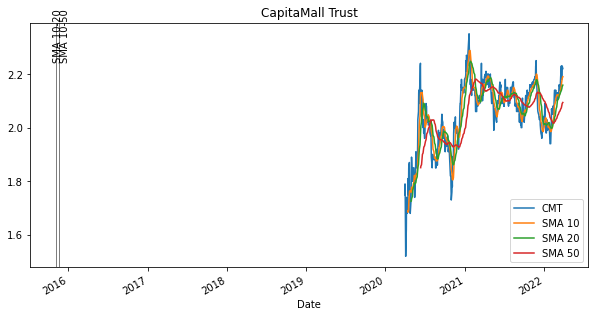

In [17]:
# simple moving averages
sma10 = CMT['Close'].rolling(10).mean() #10 days
sma20 = CMT['Close'].rolling(20).mean() #20 days
sma50 = CMT['Close'].rolling(50).mean() #50 days

CMTsma = pd.DataFrame({'CMT': CMT['Close'], 'SMA 10': sma10, 'SMA 20': sma20, 'SMA 50': sma50})
CMTsma.plot(figsize=(10, 5), legend=True, title='CapitaMall Trust')

# add vertical lines with annotations
plt.axvline(x = '2015-11-3', color = "black", lw=0.5)
plt.text('2015-10-23', 2.25, 'SMA 10-20',rotation=90)
plt.axvline(x = '2015-11-20', color = "black", lw=0.5)
plt.text('2015-11-24', 2.25, 'SMA 10-50',rotation=90)